### Perform Principal component analysis and perform clustering using first

### 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain  optimum number of clusters and check whether we have obtained same number of clusters with the original data  (class column we have ignored at the begining who shows it has 3 clusters)df


### 1. Import Libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

import warnings
warnings.filterwarnings('ignore')

### 2. Data Collection and Description

In [4]:
wine_data = pd.read_csv('wine.csv')
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [15]:
wine_data1= wine_data.iloc[:, 1:]
wine_data1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [17]:
wine_data1.shape

(178, 13)

In [18]:
wine_data1.dtypes

Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [19]:
wine_data1.isna().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [20]:
wine_data1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 3.Finding correlation between the variables in the data

In [21]:
corr =wine_data1.corr()

In [22]:
corr.style.background_gradient(cmap='coolwarm')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


#### There are some quite correlation between variables. For example the correlation between flavanoids and dilution is pretty high (78%).

#### Thus we can remove that variable from our dataset. However this method is long and tedious. Hence we use PCA method for Dimensionaluty Reduction 

### 4.Dimensionality Reduction with PCA

In [23]:
# Normalizing the data
winedata_norm = StandardScaler().fit_transform(wine_data1)

In [41]:
pca = PCA(n_components=13)

In [42]:
principal_components = pca.fit_transform(wine_data1)

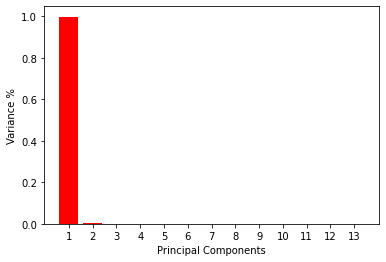

In [86]:
PC = range(1, pca.n_components_+1)
plt.bar(PC,pca.explained_variance_ratio_,color ='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)
plt.show()

In [44]:
PCA_components = pd.DataFrame(principal_components)

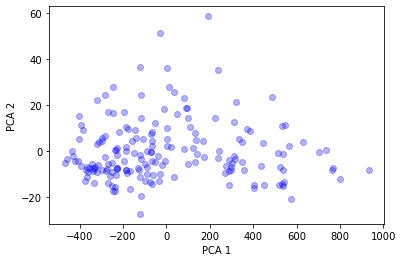

In [45]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

#### As shown in the bar graph, most of the variance is put in the first 1 components.

#### Since there is no much variance present from the second components, lets just use first component in our analysis.

### 5.Finding out the optimal number of clusters

In [46]:
wcss = []

In [47]:
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_components.iloc[:,:3])
    wcss.append(kmeans.inertia_)

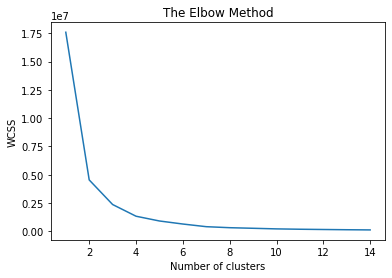

In [48]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### The scree plot levels off at k=3 and let's use it to determine the clusters

### 6.K Clusters

In [53]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

KMeans(n_clusters=3)

In [54]:
labels = model.predict(PCA_components.iloc[:,:2])

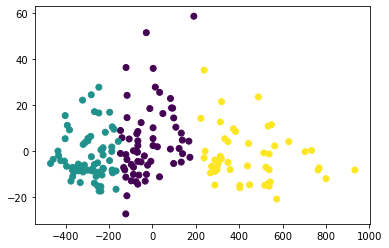

In [55]:
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [57]:
k_new_df=pd.DataFrame(principal_components[:,0:2])

In [58]:
model_k = KMeans(n_clusters=3)
model_k.fit(k_new_df)

KMeans(n_clusters=3)

In [59]:
model_k.labels_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [60]:
md=pd.Series(model_k.labels_)

In [62]:
wine_data1['clust']=md

In [63]:
k_new_df.head()

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [65]:
wine_data1.groupby(wine_data1.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,
0,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884
1,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936
2,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710


### 7.H Clusters

In [66]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [67]:
h_cluster = model2.fit(PCA_components.iloc[:,:2])

In [68]:
labels2 = model2.labels_

In [69]:
X = PCA_components.iloc[:,:1]
Y = PCA_components.iloc[:,1:2]

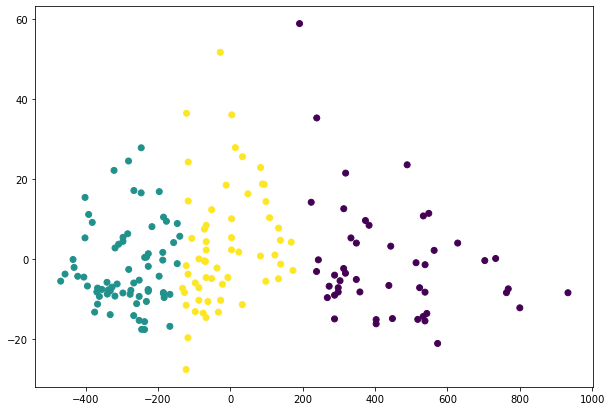

In [70]:
plt.figure(figsize=(10, 7))  
plt.scatter(X, Y, c=labels2)

In [72]:
h_new_df=pd.DataFrame(principal_components[:,0:2])

In [73]:
h_new_df.head()

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [74]:
hcf = linkage(h_new_df,method="complete",metric="euclidean")

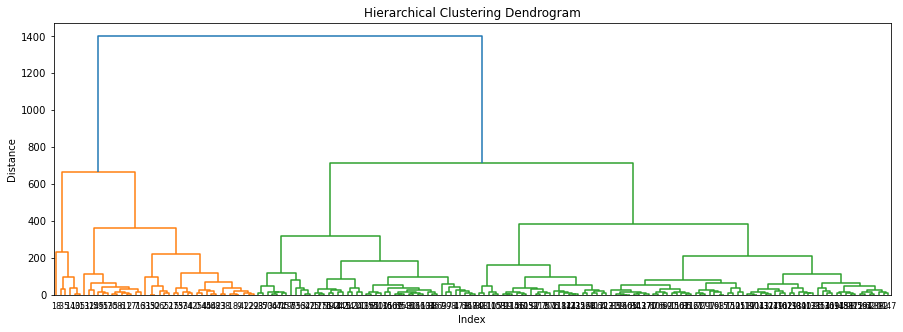

In [76]:
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(hcf,
    leaf_rotation=0.,
    leaf_font_size=8)
plt.show()

In [77]:
h_complete = AgglomerativeClustering(n_clusters=5,linkage='complete',affinity = "euclidean").fit(h_new_df)

In [78]:
h_complete.labels_

array([0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 3, 4, 4, 2,
       3, 3, 2, 2, 2, 4, 3, 2, 2, 4, 4, 3, 2, 3, 4, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 4, 4, 2, 3, 4, 3, 4, 2, 3, 4, 4, 2, 4, 3, 3, 4, 2,
       3, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3,
       3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 4, 3, 3, 3, 3, 3, 4, 2,
       3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2,
       2, 3], dtype=int64)

In [79]:
cluster_labels=pd.Series(h_complete.labels_)

In [81]:
wine_data1['clust']=cluster_labels
wine_data1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [82]:
wine_data1.groupby(wine_data1.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,
0,13.762162,1.909459,2.437297,16.837838,104.081081,2.789459,2.938919,0.288649,1.848378,5.539189,1.070541,3.112973,1163.783784
1,14.136667,1.831667,2.411667,16.266667,107.666667,3.255000,3.493333,0.271667,2.216667,7.233333,1.113333,3.028333,1530.333333
2,13.027447,2.528511,2.387234,19.395745,107.489362,2.224894,1.816809,0.374681,1.611702,5.379787,0.929915,2.550638,789.468085
3,12.699833,2.538000,2.360500,21.106667,94.600000,1.913833,1.419333,0.411333,1.345667,5.216000,0.862500,2.233833,551.050000
4,12.350357,2.253929,2.241429,20.410714,90.321429,2.371071,2.177143,0.350357,1.607143,3.077857,1.024286,2.772143,376.321429


### 8.Conclusion


#### Using PCA we reduced the variables to only 1  from 13 and use clustering classification, we can safely assume that there exists 3 cluster in the wine data sets